# Try to remove doublet from mouse multiome RNAseq data by Scrublet

In [1]:
%matplotlib inline
import scrublet as scr
import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rc('font', size=14)
plt.rcParams['pdf.fonttype'] = 42

In [3]:
os.chdir('/data/User/sunym/temp/')
os.getcwd()

'/data/User/sunym/temp'

## E145_1

### read data

In [4]:
E145_1_RNA = pd.read_csv('/data/User/sunym/temp/mouse_E145_1.csv')
E145_1_RNA = E145_1_RNA.drop(columns=['Unnamed: 0'])
E145_1_RNA = E145_1_RNA.T
E145_1_RNA

,0,1,2,3,4,5,6,7,8,9,...,55477,55478,55479,55480,55481,55482,55483,55484,55485,55486
AAACAGCCACATTAAC.1,0,0,0,0,0,0,0,0,0,0,...,5,1,0,0,0,0,0,0,0,0
AAACATGCAACCTAAT.1,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
AAACATGCAAGGGTTG.1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AAACATGCACGAACAG.1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
AAACCAACAAGGTATA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGGCATGCTTAG.1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
TTTGTGTTCTGTGCAG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TTTGTTGGTCGAAGTC.1,0,0,1,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
TTTGTTGGTGACATAT.1,0,0,6,0,0,0,0,1,0,0,...,2,0,0,0,0,0,0,0,0,0


In [5]:
E145_1_cell_list = E145_1_RNA.index
E145_1_cell_list

Index(['AAACAGCCACATTAAC.1', 'AAACATGCAACCTAAT.1', 'AAACATGCAAGGGTTG.1',
       'AAACATGCACGAACAG.1', 'AAACCAACAAGGTATA.1', 'AAACCAACAGGCTACT.1',
       'AAACCAACAGTCTAAT.1', 'AAACCAACATGAGTTT.1', 'AAACCGAAGAAGGTGC.1',
       'AAACCGAAGCTGAGGG.1',
       ...
       'TTTGTGAAGGTCTTGG.1', 'TTTGTGAAGTGCTGTG.1', 'TTTGTGGCAACTAGCC.1',
       'TTTGTGGCAGCATGAG.1', 'TTTGTGGCAGGAACTG.1', 'TTTGTGGCATGCTTAG.1',
       'TTTGTGTTCTGTGCAG.1', 'TTTGTTGGTCGAAGTC.1', 'TTTGTTGGTGACATAT.1',
       'TTTGTTGGTGTTTGTC.1'],
      dtype='object', length=4072)

In [6]:
E145_1_RNA = E145_1_RNA.values

### Scrublet

In [7]:
scrub = scr.Scrublet(E145_1_RNA, expected_doublet_rate=0.04)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.46
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.5%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 14.6%
Elapsed time: 5.5 seconds


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

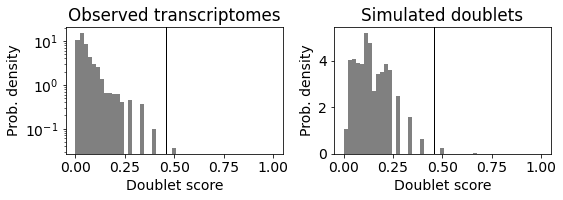

In [8]:
scrub.plot_histogram()

In [9]:
scrub.call_doublets(threshold=0.17)

Detected doublet rate = 6.6%
Estimated detectable doublet fraction = 39.5%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 16.7%


array([False, False, False, ..., False, False, False])

(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

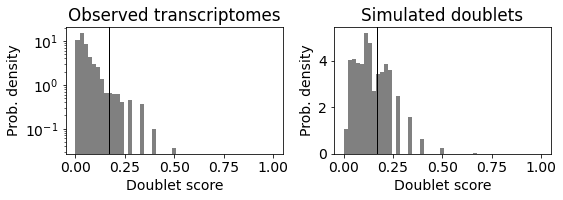

In [10]:
scrub.plot_histogram()

Running UMAP...


/data/User/sunym/env/Python_3.9.7/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Done.


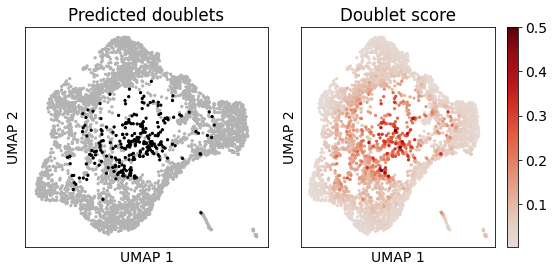

In [11]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [12]:
a = np.array([E145_1_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('/data/User/sunym/project/Brain/res/step_42_fig_220707/E145_1_scrublet.csv', index=False,header=True)

## E155_1

### read data

In [13]:
E155_1_RNA = pd.read_csv('/data/User/sunym/temp/mouse_E155_1.csv')
E155_1_RNA = E155_1_RNA.drop(columns=['Unnamed: 0'])
E155_1_RNA = E155_1_RNA.T
E155_1_RNA

,0,1,2,3,4,5,6,7,8,9,...,55477,55478,55479,55480,55481,55482,55483,55484,55485,55486
AAACCGAAGAATCTCA.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCGAAGGATCCGC.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCGAAGGTCCAAT.1,0,0,2,0,3,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
AAACGGATCATAACTG.1,0,0,5,0,0,0,0,0,0,0,...,9,1,0,0,0,0,0,0,0,0
AAACGTACAATGCCCG.1,0,0,7,0,0,0,0,0,0,0,...,2,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCTAGACTATTG.1,0,0,5,0,0,0,0,1,0,0,...,4,0,0,0,0,0,0,0,0,0
TTTGTCTAGTTTGTCT.1,0,0,4,0,0,1,0,0,0,0,...,4,2,0,0,0,0,0,0,0,0
TTTGTGTTCATTATGG.1,0,0,29,0,0,0,1,0,0,0,...,14,2,0,0,0,0,0,0,0,0
TTTGTGTTCCTAATAG.1,0,0,10,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0


In [14]:
E155_1_cell_list = E155_1_RNA.index
E155_1_cell_list

Index(['AAACCGAAGAATCTCA.1', 'AAACCGAAGGATCCGC.1', 'AAACCGAAGGTCCAAT.1',
       'AAACGGATCATAACTG.1', 'AAACGTACAATGCCCG.1', 'AAAGCAAGTCCCGAAG.1',
       'AAAGCGGGTTTACCGT.1', 'AAAGGCTCACCTCACC.1', 'AAATCCGGTGTTAGCA.1',
       'AAATCCGGTTGCACAA.1',
       ...
       'TTTGCATTCAGGGCCT.1', 'TTTGCATTCCGCACAA.1', 'TTTGGCTGTTTGTTGC.1',
       'TTTGGTGCAATTGACT.1', 'TTTGTCCCAGGCGAGT.1', 'TTTGTCTAGACTATTG.1',
       'TTTGTCTAGTTTGTCT.1', 'TTTGTGTTCATTATGG.1', 'TTTGTGTTCCTAATAG.1',
       'TTTGTGTTCTAACCAA.1'],
      dtype='object', length=1351)

In [15]:
E155_1_RNA = E155_1_RNA.values

### Scrublet

In [16]:
scrub = scr.Scrublet(E155_1_RNA, expected_doublet_rate=0.04)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.32
Detected doublet rate = 0.3%
Estimated detectable doublet fraction = 1.1%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 27.6%
Elapsed time: 1.4 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

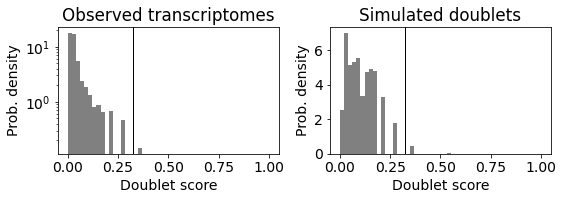

In [17]:
scrub.plot_histogram()

In [18]:
scrub.call_doublets(threshold=0.13)

Detected doublet rate = 5.8%
Estimated detectable doublet fraction = 31.2%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 18.5%


array([False, False, False, ...,  True, False, False])

(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

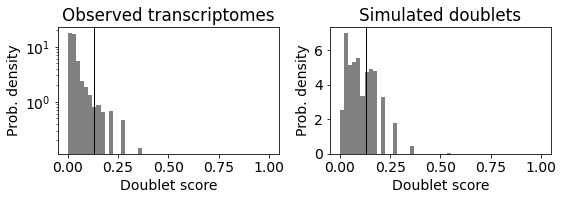

In [19]:
scrub.plot_histogram()

Running UMAP...
Done.


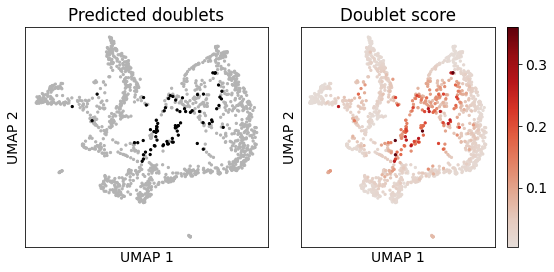

In [20]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [21]:
a = np.array([E155_1_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('/data/User/sunym/project/Brain/res/step_42_fig_220707/E155_1_scrublet.csv', index=False,header=True)

## E155_2

### read data

In [22]:
E155_2_RNA = pd.read_csv('/data/User/sunym/temp/mouse_E155_2.csv')
E155_2_RNA = E155_2_RNA.drop(columns=['Unnamed: 0'])
E155_2_RNA = E155_2_RNA.T
E155_2_RNA

,0,1,2,3,4,5,6,7,8,9,...,55477,55478,55479,55480,55481,55482,55483,55484,55485,55486
AAACATGCATTGGGAG.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCGAAGAGAGCCG.1,0,0,1,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
AAACCGAAGCTTACTT.1,0,0,8,0,1,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
AAACCGAAGTGAACCT.1,0,0,2,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
AAACCGCGTTAATCGG.1,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTAAGGGACCTC.1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
TTTGTCCCAGGCCAAA.1,0,0,4,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,0
TTTGTCTAGCAAGGAC.1,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
TTTGTGGCAATATGGA.1,0,0,28,0,0,1,0,1,0,0,...,5,0,0,0,0,0,0,0,0,0


In [23]:
E155_2_cell_list = E155_2_RNA.index
E155_2_cell_list

Index(['AAACATGCATTGGGAG.1', 'AAACCGAAGAGAGCCG.1', 'AAACCGAAGCTTACTT.1',
       'AAACCGAAGTGAACCT.1', 'AAACCGCGTTAATCGG.1', 'AAACCGCGTTGTTGCT.1',
       'AAACCGGCAAGGTATA.1', 'AAACCGGCACCAGGTT.1', 'AAACGCGCAGTAGGTG.1',
       'AAACGTACAGTTTCTC.1',
       ...
       'TTTGCATTCACAAGCT.1', 'TTTGCGGAGTGTGATC.1', 'TTTGGCTGTGTTGTGA.1',
       'TTTGGCTGTTGCGCGA.1', 'TTTGGCTGTTGTTGGA.1', 'TTTGGTAAGGGACCTC.1',
       'TTTGTCCCAGGCCAAA.1', 'TTTGTCTAGCAAGGAC.1', 'TTTGTGGCAATATGGA.1',
       'TTTGTTGGTTACTTGC.1'],
      dtype='object', length=2825)

In [24]:
E155_2_RNA = E155_2_RNA.values

### Scrublet

In [25]:
scrub = scr.Scrublet(E155_2_RNA, expected_doublet_rate=0.04)
doublet_scores, predicted_doublets = scrub.scrub_doublets(min_counts=2, 
                                                          min_cells=3, 
                                                          min_gene_variability_pctl=85, 
                                                          n_prin_comps=30)

Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.42
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 1.1%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 6.6%
Elapsed time: 3.2 seconds


(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

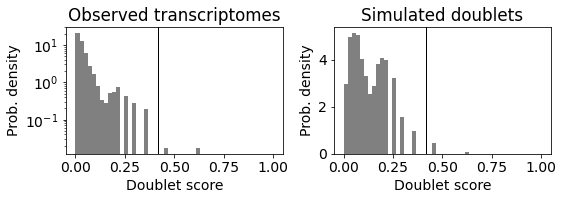

In [26]:
scrub.plot_histogram()

In [27]:
scrub.call_doublets(threshold=0.15)

Detected doublet rate = 5.6%
Estimated detectable doublet fraction = 37.1%
Overall doublet rate:
	Expected   = 4.0%
	Estimated  = 15.2%


array([False,  True, False, ..., False, False, False])

(<Figure size 576x216 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <AxesSubplot:title={'center':'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

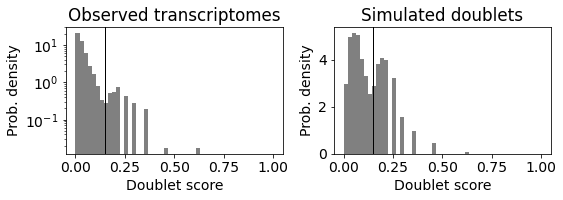

In [28]:
scrub.plot_histogram()

Running UMAP...
Done.


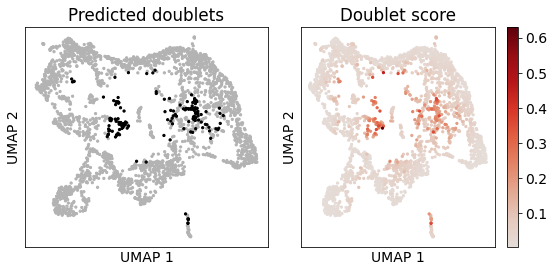

In [29]:
print('Running UMAP...')
scrub.set_embedding('UMAP', scr.get_umap(scrub.manifold_obs_, 10, min_dist=0.3))

# # Uncomment to run tSNE - slow
# print('Running tSNE...')
# scrub.set_embedding('tSNE', scr.get_tsne(scrub.manifold_obs_, angle=0.9))

# # Uncomment to run force layout - slow
# print('Running ForceAtlas2...')
# scrub.set_embedding('FA', scr.get_force_layout(scrub.manifold_obs_, n_neighbors=5. n_iter=1000))
    
print('Done.')

scrub.plot_embedding('UMAP', order_points=True);

# scrub.plot_embedding('tSNE', order_points=True);
# scrub.plot_embedding('FA', order_points=True);

In [30]:
a = np.array([E155_2_cell_list,doublet_scores,predicted_doublets])
a = pd.DataFrame({'barcodes':a[0,:],'score':a[1,:],'prediction':a[2,:]})
a.to_csv('/data/User/sunym/project/Brain/res/step_42_fig_220707/E155_2_scrublet.csv', index=False,header=True)